In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from datetime import datetime as dt
from sklearn.model_selection import train_test_split
co19=pd.read_csv('covid_19_india.csv')

In [2]:

co19['Date']=pd.to_datetime(co19['Date'])
co19['Date']=co19['Date'].map(dt.toordinal)
df=co19.groupby(co19['Date']).sum()
y=df['Deaths'].values
x=co19['Date'].unique()
x,y

(array([737454, 737455, 737456, 737457, 737458, 737459, 737460, 737461,
        737462, 737463, 737464, 737465, 737466, 737467, 737468, 737469,
        737470, 737471, 737472, 737473, 737474, 737475, 737476, 737477,
        737478, 737479, 737480, 737481, 737482, 737483, 737484, 737485,
        737486, 737487, 737488, 737489, 737490, 737491, 737492, 737493,
        737494, 737495, 737496, 737497, 737498, 737499, 737500, 737501,
        737502, 737503, 737504, 737505, 737506, 737507, 737508, 737509,
        737510, 737511, 737512, 737513, 737514, 737515, 737516, 737517,
        737518, 737519, 737520, 737521, 737522, 737523, 737524, 737525,
        737526, 737527, 737528, 737529, 737530, 737531, 737532, 737533,
        737534, 737535, 737536, 737537, 737538, 737539, 737540, 737541,
        737542, 737543, 737544, 737545, 737546, 737547, 737548, 737549,
        737550, 737551, 737552, 737553, 737554, 737555, 737556, 737557,
        737558, 737559, 737560, 737561, 737562, 737563, 737564, 

In [74]:
xtr,xte,ytr,yte=train_test_split(x,y)

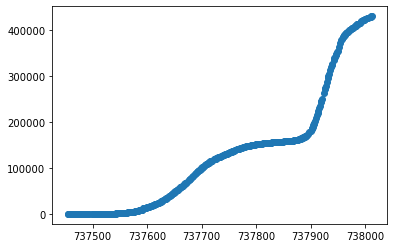

In [76]:
plt.scatter(xtr,ytr)

In [77]:
mean_x=np.mean(x)
mean_y=np.mean(y)
m=len(x)
numer=0
denom=0
for i in range(m):
    numer += (x[i]-mean_x)*(y[i]-mean_y)
    denom +=(x[i]-mean_x)**2
b1=numer/denom
b0=mean_y-(b1*mean_x)
b1,b0

(732.9500773166642, -540590774.0694505)

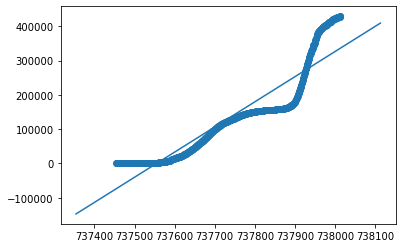

In [78]:

maxx=np.max(x)+100
minx=np.min(x)-100
X=np.linspace(minx,maxx,1000)
Y=b0+b1*X
plt.plot(X,Y)
plt.scatter(x,y)

In [79]:
from sklearn.linear_model import LinearRegression as LR

In [80]:
linear_regression=LR()

In [84]:
linear_regression.fit(xtr.reshape(-1,1),ytr)

LinearRegression()

In [89]:
pred=linear_regression.predict(xte.reshape(-1,1))

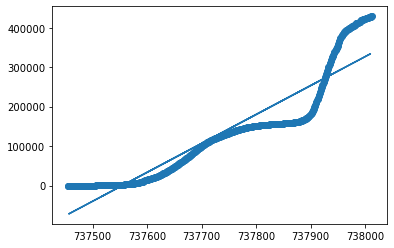

In [93]:
plt.scatter(x,y)
plt.plot(xte,pred)